In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [58]:
df = pd.read_csv("delivery_time (1).csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [59]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [60]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


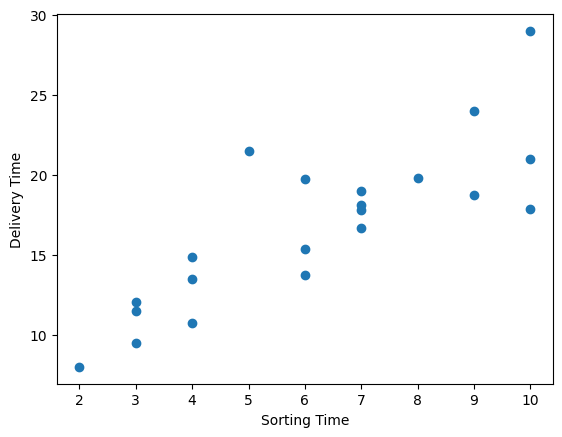

In [61]:
# Visualize the relationship between delivery time and sorting time
plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [62]:
# Split the data into input and output variables
X = df['Sorting Time'].values.reshape(-1, 1)
y = df['Delivery Time'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(' Root Mean Squared Error (RMSE):', rmse)
print('Coefficient of Determination (R^2 Score):', r2)

 Root Mean Squared Error (RMSE): 3.7478979383962754
Coefficient of Determination (R^2 Score): -1.020759958636741


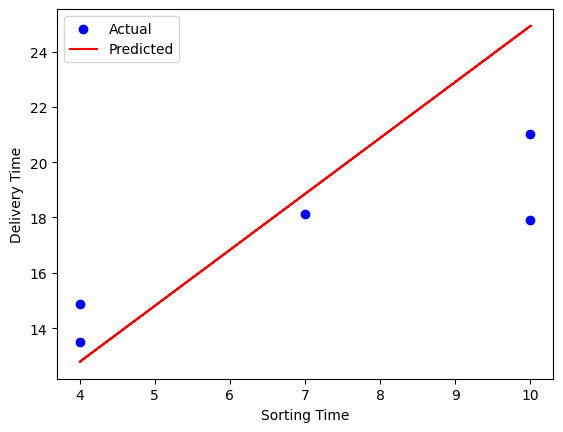

In [64]:
# Plot the predicted values against the actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

In [65]:
# Predict delivery time for new data
new_data = {'Sorting Time': [12, 8, 6]}

new_df = pd.DataFrame(new_data)
new_predictions = model.predict(new_df)

print('Predictions for new data:')
print(new_predictions)


Predictions for new data:
[[28.97323261]
 [20.87625439]
 [16.82776528]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [66]:
# Apply logarithmic transformation (log)
log_X_train = np.log(X_train)
log_X_test = np.log(X_test)
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

# Apply square transformation
square_X_train = np.square(X_train)
square_X_test = np.square(X_test)
square_y_train = np.square(y_train)
square_y_test = np.square(y_test)

# Apply square root transformation (sqrt)
sqrt_X_train = np.sqrt(X_train)
sqrt_X_test = np.sqrt(X_test)
sqrt_y_train = np.sqrt(y_train)
sqrt_y_test = np.sqrt(y_test)



In [67]:
# Create new linear regression models for each transformation
log_model = LinearRegression()
log_model.fit(log_X_train, log_y_train)
log_y_pred = log_model.predict(log_X_test)
log_rmse = np.sqrt(mean_squared_error(log_y_test, log_y_pred))

square_model = LinearRegression()
square_model.fit(square_X_train, square_y_train)
square_y_pred = square_model.predict(square_X_test)
square_rmse = np.sqrt(mean_squared_error(square_y_test, square_y_pred))

sqrt_model = LinearRegression()
sqrt_model.fit(sqrt_X_train, sqrt_y_train)
sqrt_y_pred = sqrt_model.predict(sqrt_X_test)
sqrt_rmse = np.sqrt(mean_squared_error(sqrt_y_test, sqrt_y_pred))



In [68]:
print("Log transformation RMSE:", log_rmse)
print("Square transformation RMSE:", square_rmse)
print("Square root transformation RMSE:", sqrt_rmse)

Log transformation RMSE: 0.15544736142374702
Square transformation RMSE: 183.2430070809212
Square root transformation RMSE: 0.38172091182267615


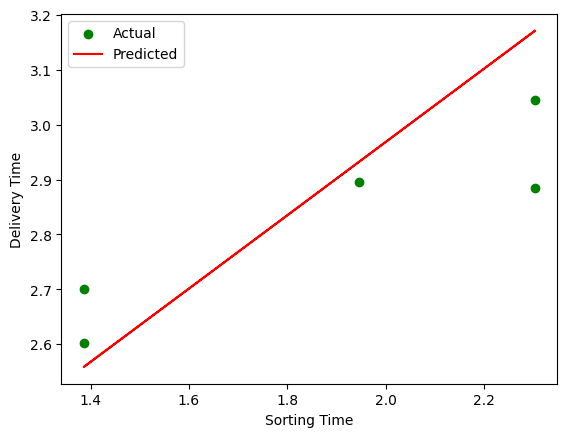

In [69]:
# Plot the predicted values against the actual values
plt.scatter(log_X_test, log_y_test, color='green', label='Actual')
plt.plot(log_X_test, log_y_pred, color='red', label='Predicted')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

In [70]:
# Predict delivery time for new data using the log model (based on RMSE)
new_data = {'Sorting Time': [12, 8, 6]}
new_X = pd.DataFrame(new_data)['Sorting Time'].values.reshape(-1, 1)

# Use the selected transformation and model
new_X_transformed = np.log(new_X)
new_y_pred = log_model.predict(new_X_transformed)

print("Predicted Delivery Time:")
for i in range(len(new_X)):
    print("Sorting Time:", new_X[i][0], "\tPredicted Delivery Time:", new_y_pred[i])

# Actual Answer
answer = [14.88, 10.75, 7.74]

print("\nActual Delivery Time:")
for i in range(len(new_X)):
    print("Sorting Time:", new_X[i][0], "\tActual Delivery Time:", answer[i])

Predicted Delivery Time:
Sorting Time: 12 	Predicted Delivery Time: [3.29244708]
Sorting Time: 8 	Predicted Delivery Time: [3.02168469]
Sorting Time: 6 	Predicted Delivery Time: [2.82957572]

Actual Delivery Time:
Sorting Time: 12 	Actual Delivery Time: 14.88
Sorting Time: 8 	Actual Delivery Time: 10.75
Sorting Time: 6 	Actual Delivery Time: 7.74


In [71]:
# Predict delivery time for new data using the sqrt model (based on RMSE)
new_data = {'Sorting Time': [12, 8, 6]}
new_X = pd.DataFrame(new_data)['Sorting Time'].values.reshape(-1, 1)

# Use the selected transformation and model
new_X_transformed = np.sqrt(new_X)
new_y_pred = sqrt_model.predict(new_X_transformed)

print("Predicted Delivery Time:")
for i in range(len(new_X)):
    print("Sorting Time:", new_X[i][0], "\tPredicted Delivery Time:", new_y_pred[i])

# Actual Answer
answer = [14.88, 10.75, 7.74]

print("\nActual Delivery Time:")
for i in range(len(new_X)):
    print("Sorting Time:", new_X[i][0], "\tActual Delivery Time:", answer[i])

Predicted Delivery Time:
Sorting Time: 12 	Predicted Delivery Time: [5.29664025]
Sorting Time: 8 	Predicted Delivery Time: [4.55241555]
Sorting Time: 6 	Predicted Delivery Time: [4.10876937]

Actual Delivery Time:
Sorting Time: 12 	Actual Delivery Time: 14.88
Sorting Time: 8 	Actual Delivery Time: 10.75
Sorting Time: 6 	Actual Delivery Time: 7.74


In [72]:
# Predict delivery time for new data using the linear model (based on RMSE)
new_data = {'Sorting Time': [12, 8, 6]}
new_X = pd.DataFrame(new_data)['Sorting Time'].values.reshape(-1, 1)

# Use the selected transformation and model
new_X_transformed = new_X
new_y_pred = model.predict(new_X_transformed)

print("Predicted Delivery Time:")
for i in range(len(new_X)):
    print("Sorting Time:", new_X[i][0], "\tPredicted Delivery Time:", new_y_pred[i])

# Actual Answer
answer = [14.88, 10.75, 7.74]

print("\nActual Delivery Time:")
for i in range(len(new_X)):
    print("Sorting Time:", new_X[i][0], "\tActual Delivery Time:", answer[i])

Predicted Delivery Time:
Sorting Time: 12 	Predicted Delivery Time: [28.97323261]
Sorting Time: 8 	Predicted Delivery Time: [20.87625439]
Sorting Time: 6 	Predicted Delivery Time: [16.82776528]

Actual Delivery Time:
Sorting Time: 12 	Actual Delivery Time: 14.88
Sorting Time: 8 	Actual Delivery Time: 10.75
Sorting Time: 6 	Actual Delivery Time: 7.74


q-2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data (1).csv to Salary_Data (1).csv


In [36]:
df = pd.read_csv("Salary_Data (1).csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [38]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


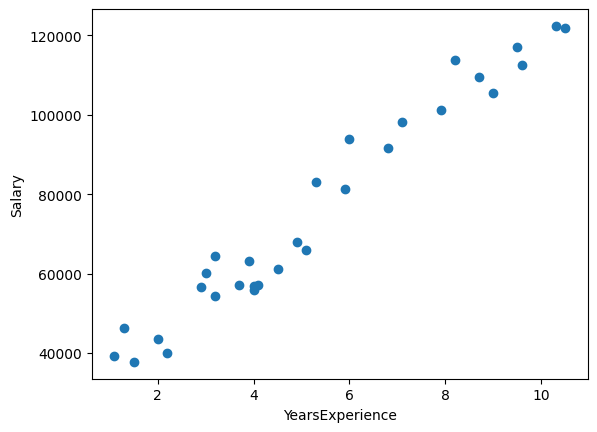

In [39]:
# Visualize the relationship between Salary and YearsExperience
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [40]:
# Split the data into input and output variables
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse =np.sqrt( mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Root Mean Squared Error (RMSE):', rmse)
print('Coefficient of Determination (R^2 Score):', r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Coefficient of Determination (R^2 Score): 0.9024461774180497


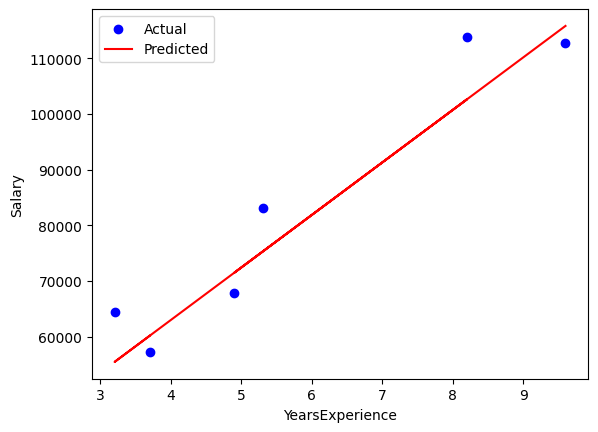

In [43]:
# Plot the predicted values against the actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [54]:
# Predict delivery time for new data
new_data = {'YearsExperience': [12.5, 15, 3.7]}

new_df = pd.DataFrame(new_data)
new_predictions = model.predict(new_df)

print('Predictions for new data:')
print(new_predictions)


Predictions for new data:
[[143119.27454966]
 [166678.81285724]
 [ 60189.69970699]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [45]:
# Apply logarithmic transformation (log)
log_X_train = np.log(X_train)
log_X_test = np.log(X_test)
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

# Apply square transformation
square_X_train = np.square(X_train)
square_X_test = np.square(X_test)
square_y_train = np.square(y_train)
square_y_test = np.square(y_test)

# Apply square root transformation (sqrt)
sqrt_X_train = np.sqrt(X_train)
sqrt_X_test = np.sqrt(X_test)
sqrt_y_train = np.sqrt(y_train)
sqrt_y_test = np.sqrt(y_test)


In [46]:
# Create new linear regression models for each transformation
log_model = LinearRegression()
log_model.fit(log_X_train, log_y_train)
log_y_pred = log_model.predict(log_X_test)
log_rmse = np.sqrt(mean_squared_error(log_y_test, log_y_pred))

square_model = LinearRegression()
square_model.fit(square_X_train, square_y_train)
square_y_pred = square_model.predict(square_X_test)
square_rmse = np.sqrt(mean_squared_error(square_y_test, square_y_pred))

sqrt_model = LinearRegression()
sqrt_model.fit(sqrt_X_train, sqrt_y_train)
sqrt_y_pred = sqrt_model.predict(sqrt_X_test)
sqrt_rmse = np.sqrt(mean_squared_error(sqrt_y_test, sqrt_y_pred))


In [47]:
print("Log transformation RMSE:", log_rmse)
print("Square transformation RMSE:", square_rmse)
print("Square root transformation RMSE:", sqrt_rmse)

Log transformation RMSE: 0.09581882663118917
Square transformation RMSE: 1359446133.7871788
Square root transformation RMSE: 12.21143631740679


In [48]:
# Predict Salary for new data using the log model (based on RMSE)
new_data = {'YearsExperience': [7.1, 9, 10.5]}
new_X = pd.DataFrame(new_data)['YearsExperience'].values.reshape(-1, 1)

# Use the selected transformation and model
new_X_transformed = np.log(new_X)
new_y_pred = log_model.predict(new_X_transformed)

print("Predicted Salary:")
for i in range(len(new_X)):
    print("YearsExperience:", new_X[i][0], "\tPredicted Salary:", new_y_pred[i])

# Actual Answer
answer = [98273.0, 105582.0, 121872.0]

print("\nActual Salary:")
for i in range(len(new_X)):
    print("YearsExperience:", new_X[i][0], "\tActual Salary:", answer[i])

Predicted Salary:
YearsExperience: 7.1 	Predicted Salary: [11.42008454]
YearsExperience: 9.0 	Predicted Salary: [11.55101438]
YearsExperience: 10.5 	Predicted Salary: [11.63612779]

Actual Salary:
YearsExperience: 7.1 	Actual Salary: 98273.0
YearsExperience: 9.0 	Actual Salary: 105582.0
YearsExperience: 10.5 	Actual Salary: 121872.0


In [53]:
# Predict salary for new data using the best model (based on RMSE)
new_data = {'YearsExperience': [11, 12, 13]}
new_X = pd.DataFrame(new_data)['YearsExperience'].values.reshape(-1, 1)

# Use the selected transformation and model
new_X_transformed = np.sqrt(new_X)
new_y_pred = sqrt_model.predict(new_X_transformed)

print("Predicted Salary:")
for i in range(len(new_X)):
    print("Years of Experience:", new_X[i][0], "\tPredicted Salary:", new_y_pred[i])

# Actual Answer
answer = [126502.92009837, 129218.27838334, 131876.90605107]

print("\nActual Salary:")
for i in range(len(new_X)):
    print("Years of Experience:", new_X[i][0], "\tActual Salary:", answer[i])

Predicted Salary:
Years of Experience: 11 	Predicted Salary: [352.74545241]
Years of Experience: 12 	Predicted Salary: [363.79440991]
Years of Experience: 13 	Predicted Salary: [374.39181251]

Actual Salary:
Years of Experience: 11 	Actual Salary: 126502.92009837
Years of Experience: 12 	Actual Salary: 129218.27838334
Years of Experience: 13 	Actual Salary: 131876.90605107


In [55]:
# Predict salary for new data
new_data = {'YearsExperience': [11, 12, 13]}
new_X = pd.DataFrame(new_data)['YearsExperience'].values.reshape(-1, 1)
new_y_pred = model.predict(new_X)

print("Predicted Salary:")
for i in range(len(new_X)):
    print("Years of Experience:", new_X[i][0], "\tPredicted Salary:", new_y_pred[i])

Predicted Salary:
Years of Experience: 11 	Predicted Salary: [128983.55156512]
Years of Experience: 12 	Predicted Salary: [138407.36688815]
Years of Experience: 13 	Predicted Salary: [147831.18221118]


In [ ]:
# linear model is best for this data set